# Microsoft Stock Price Case Study

## Context

Companies' worth or its total market value is called market capitalization or market cap. It is equal to the share price multiplied by the number of shares outstanding. Stock price is a proportional and relative  value of companies' growth. Here, analysing the stock price data will help us to understand a company's growth. Increase in stock price increases the company's market value.

## Problem statement

We have Collected the latest data of Microsoft Stock price and calculated daily log return which is approximately  normally distributed. Let us try to answer some of the question that will help us to decide roughly whether to invest in the Microsoft shares or not?

a) What is the probability that the stock price will drop over 5% in a day? 

b) What is the probability that the stock price will drop over 10% in a day?
 
c) What is the probability that the stock price will drop over 50% in a year? 

d) What is the probability that the stock price will drop over 25% in a year?

e) What is the 50th percentile  of the yearly stock price?

## Data Description

Stock price data of Microsoft  is collected from [Yahoo finance](https://finance.yahoo.com/quote/MSFT/history/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAACSI6SR_7Lby3ssAYvSwbF4Vrasme85BzSE1On02J71Ft-9OAY7hldPaYfYfqY4cCXkAj2PzEpzcLOBo3Usc4RC37eM4jZI5bqXmsXoAdEWXXDKLtJpZI4GK2EAXM8HRWFhkkkUckOoyxvcw66UVWlAnUMRswLPnIPNivRXivisH). It has four main attributes, as follows:

1. **Date:** Date of the stock price records.

2. **Open:** The average value of opened price on a particular day.

3. **Close:**  The average value of closed  price on a particular day.

4. **Low:** The lowest price reached on a particular day.

5. **High:** The highest price reached on a particular day.

### Importing libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

# importing normal distribution functions
from scipy.stats import norm 


### Reading the Data into the Dataframe

In [2]:
ms = pd.read_csv('MSFT.csv')
ms.head()

Date        Open        High         Low       Close   Adj Close  \
0  2020-01-10  162.820007  163.220001  161.179993  161.339996  159.648727   
1  2020-01-13  161.759995  163.309998  161.259995  163.279999  161.568405   
2  2020-01-14  163.389999  163.600006  161.720001  162.130005  160.430450   
3  2020-01-15  162.619995  163.940002  162.570007  163.179993  161.469452   
4  2020-01-16  164.350006  166.240005  164.029999  166.169998  164.428116   

     Volume  
0  20725900  
1  21626500  
2  23477400  
3  21417900  
4  23865400

In [3]:
# checking the shape of the data
ms.shape

(252, 7)

* There are 252 rows and 7 columns.

In [4]:
# inspecting the dataset
ms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


* There are 6 numeric features about the stock price, and one categorical feature 'Date'.

In [5]:
# checking for missing values
ms.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

* There are no missing values in the data.

## Log Daily Return


Log returns are defined as the calculation of return on investment using logarithm. It  gives a much clearer picture about the overall returns than the arithmetic formula that we use for returns in everyday life.

**Consider an example to understand this**

The closing price of for three days are:

Day 1: Rs 100

Day 2: Rs 150

Day 3: Rs 75

Calculation of returns using arithmetic return calculation:

Return= (Final Value - Initial value)/Initial Value

Return on Day 2: (150-100)/100 =0.50 that is 50%

Return on Day 3: (75-150)/150= -0.50 that is -50%

Overall return: (75-100)/100= -0.25 that is -25%

Here it shows that there was a gain of 50% on day 2 and a loss of 50% on day 3. It looks like there is neither loss, nor gain at this point. But actually there is a loss of 25% on Day 3 compared to Day 1. Arithmetic returns fails here.

Let us calculate the returns using Log Returns Formula

Log Return= ln(Final Value) – ln(Initial value)

Return on Day 2: ln(150)- ln(100) = 5.01 – 4.60 = 0.41

Return on Day 3: ln(75)- ln(150) = 4.32- 5.01 = -0.69

Overall return: ln(75)- ln(100) = 4.32- 4.60 = -0.28

In term of log returns the return for day 2 is 0.41 and for Day 3 is -0.69. So it is clearly visible that the loss on Day 3 is more than the gain on Day 2.The overall return is -0.28 on Day 3 ,which is the same however we calculate - either by adding the daily returns or by using the formula (ln75- ln100).

This is not true in case of arithmetic returns where we get “0” by adding daily returns when actually return is -25% in the above example. A log daily return gives a clearer picture of returns of an investment.

In [6]:
# let's calculate log daily return for Microsoft data
ms['LogReturn'] = np.log(ms['Close'])-np.log(ms['Close']).shift(1)

In [7]:
ms['LogReturn']

0           NaN
1      0.011953
2     -0.007068
3      0.006455
4      0.018158
         ...   
247   -0.021495
248    0.000964
249   -0.026271
250    0.028060
251    0.006074
Name: LogReturn, Length: 252, dtype: float64

## Mean and Standard Deviation of LogReturn 

In [8]:
#mean
mu = ms['LogReturn'].mean()
#standard deviation
sigma = ms['LogReturn'].std(ddof=1)

## Plotting the Distribution 

It  will help us analyse the shape of data distribution and PDF of normal distribution using the calculated statistics ( mu and sigma ) from data.

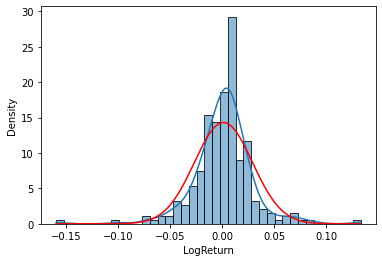

In [9]:
# Plot a histogram to show the distribution of log return of Microsoft's stock. 

density = pd.DataFrame()
density['x'] = np.arange(ms['LogReturn'].min(), ms['LogReturn'].max(), 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

sns.histplot(ms['LogReturn'], kde = True, stat = 'density')
plt.plot(density['x'], density['pdf'], color='red')
plt.show()

**Insight:**  As can be seen in the above plot, there are two curves red and blue. Blue curve represents the shape of data distribution and red curve represnts the PDF ( Probability density function ). This data is approximately normal. Thus, We can assume this data distribution as normal and apply other calculation of PDF and CDF based on normality assumption

As we already discussed that stock price represents the growth of the company and increasing or decreasing of stock price will effect the market value of the company. If anyone  would like  to buy the shares of the company then he  will  be interested in knowing the probability of increment or decrement of stock price. This probability can be calculated using CDF. Lets understand CDF.


**CDF:** of a Random variable ( X ) is the probability that X  will take the value less than or equal to x. It can be represented mathematically as -

> ## $F_x (x) = P(X \leq x) $

The library scipy.stats provides a function called cdf() to calculate the CDF of any distribution. Here, we assumed our data to be normal distribution so we can use norm.cdf() to calculate cumulative probability density for a normal distribution

## Calculating Probabilities

### a) What is the probability that the stock price will drop over 5% in a day? 

In [10]:
# We are to calculate P(X<=-0.05)
prob_drop5_day = norm.cdf(-0.05,loc=mu, scale=sigma)
print('The required probability that the stock price will drop over 5% in a day is '+ str(prob_drop5_day))

The required probability that the stock price will drop over 5% in a day is 0.033181437344865984


### b) What is the probability that the stock price will drop over 10% in a day?


In [11]:
# We are to calculate P(X<=-0.10)
prob_drop10_day=norm.cdf(-0.10, loc=mu, scale = sigma)
print('The probability that the stock price will drop over 10% in a day is '+str(prob_drop10_day))

The probability that the stock price will drop over 10% in a day is 0.0001428695000257634


### c) What is the probability that the stock price will drop over 50% in a year? 


While, considering the volatility of stock price for a year, we have to calculate the annual standard deviation.Therefore, we will have to annualize the standard deviation calculated using the periodic data.

Here, we shall assume that there are 250 trading days in a year. Depending on weekends and public holidays, this number may vary between 250 and 260.

The annualized standard deviation of daily returns is calculated as follows:

> Annualized Standard Deviation = Standard Deviation of Daily Returns * Square Root (250)

**Note: For more details on the above formula for annualized standard deviation, please refer to this [article](https://financetrain.com/calculate-annualized-standard-deviation).**

For yearly calculation, mean can be calculated as:
> Annual Mean = Mean of Daily Returns * 250

In [12]:
# calculating mean and standard deviation for yearly log-return
mu_yearly = mu * 250
sigma_yearly = sigma * np.sqrt(250) 
# We are to calculate P(X<=0.5)
prob_drop50_year=norm.cdf(-0.5, mu_yearly, sigma_yearly)
print('The probability that the stock price will drop over 50% in a year is '+ str(prob_drop50_year) )

The probability that the stock price will drop over 50% in a year is 0.03366022235185039


### d) What is the probability that the stock price will drop over 25% in a year?


In [13]:
# We are to calculate P(X<=25)
prob_drop25_year=norm.cdf(-0.25, mu_yearly, sigma_yearly)
print('The probability that the stock price will drop over 25% in a year is '+ str(prob_drop25_year))

The probability that the stock price will drop over 25% in a year is 0.10331797034715662


### e) What is the 50th percentile  of the yearly stock price?

The 50th percentile is the value which has a cumulative probability density of 50% or 0.50
We can calculate the percentile values using the function norm.ppf()

In [14]:
# We are to calculate x such that P(X<=x)=0.50
norm.ppf(0.50, loc=mu_yearly, scale=sigma_yearly)

0.30715621781524466

### Conclusion

From the above calculation, It is clear that the probability of decrement in stock price of Microsoft is very less. Therefore, It is safe to invest in the shares of Microsoft.